<a href="https://colab.research.google.com/github/CriticalDatathon/workshops/blob/main/workshop_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 2: Clinical Variables Selection & Feature Engineering

# 🎯 Workshop Goals
The goal of this workshop is to provide participants with a deep understanding of data preprocessing in the data science workflow. Specifically, by the end of this workshop, participants should be able to:

1. **Understand the importance of Data Preprocessing Techniques**: Understanding thes significance of data preprocessing in the data science workflow. This includes to be able to apply common techniques such as cleaning, normalization, transformation, and reduction of data. This also includes handling missing data, outliers, skewed data, and data with different scales.

3. **Familiarize with Data Pre-processing Techniques**: such as feature scaling, dimensionality reduction, and feature engineering.

4. **Apply data pre-processing techniques**: This involved the practical application of data preprocessing techniques to real-world datasets and to be able to evaluate the impact of different preprocessing techniques on machine learning model performance.

Be aware of the potential biases that can be introduced in data preprocessing, and how to identify and mitigate them.
Throughout the workshop, participants will engage in hands-on activities, case studies, and real-world examples. They will work in groups to apply the concepts learned to real datasets, and engage in discussions to share their experiences and insights. By the end of the workshop, participants should have gained a solid understanding of data preprocessing techniques and their importance in the data science workflow, and be able to apply these techniques to improve the performance of machine learning models.

# ✏️ Expected Deliverables

1. A report or dashboard summarizing the results of EDA, including visualizations and statistical summaries of the data distribution and correlations.

2. A set of code scripts or pipelines that automate the data preprocessing process, making it easier and more efficient to apply these techniques to future datasets.

3. A cleaned dataset that has undergone preprocessing techniques such as removal of duplicates, handling missing data, and dealing with outliers. The cleaned dataset should be ready to be fed into machine learning models.

# ❗ Highlighted Pitfall(s)
1. Make sure to apply preprocessing steps only to the training data and avoid using information from the validation set to prevent data leakage.

2. Check for potential biases that could be introduced or amplified by preprocessing techniques, and evaluate the impact of these techniques on different subgroups of the data.

3. Carefully evaluate the appropriateness of different preprocessing techniques for a given dataset and ensure that the techniques are applied correctly to avoid incorrect preprocessing that could lead to poor model performance or incorrect conclusions about the data.

## **1.  Setup environment**
---

In [3]:
#@markdown ## Import dependencies
!pip install --upgrade ipykernel
# Data reading in Dataframe format and data preprocessing
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For missing values
import missingno as msno

# Linear algebra operations
import numpy as np

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, mutual_info_regression

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.23.1 which is incompatible.


In [4]:
#@markdown ##Play the cell to connect your Google Drive to Colab


# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/MIT_Data_Team4/MIMIC_IV.csv")
df = pd.read_csv("/content/drive/MyDrive/MIMIC_IV.csv")
df.head()
list(df.columns)

Mounted at /content/drive


['subject_id',
 'stay_id',
 'SaO2_timestamp',
 'SaO2',
 'delta_SpO2',
 'SpO2',
 'hidden_hypoxemia',
 'hadm_id',
 'gender',
 'sex_female',
 'anchor_age',
 'race',
 'race_group',
 'language',
 'insurance',
 'weight',
 'height',
 'BMI',
 'anchor_year_group',
 'first_hosp_stay',
 'first_icu_stay',
 'icustay_seq',
 'admittime',
 'dischtime',
 'icu_intime',
 'icu_outtime',
 'los_hospital',
 'los_icu',
 'CCI',
 'SOFA_admission',
 'mortality_in',
 'delta_vent_start',
 'ventilation_status',
 'invasive_vent',
 'delta_FiO2',
 'FiO2',
 'delta_rrt',
 'rrt',
 'delta_vp_start',
 'norepinephrine_equivalent_dose',
 'delta_sofa_coag',
 'sofa_coag',
 'delta_sofa_liver',
 'sofa_liver',
 'delta_sofa_cv',
 'sofa_cv',
 'delta_sofa_cns',
 'sofa_cns',
 'delta_sofa_renal',
 'sofa_renal',
 'delta_sofa_resp',
 'sofa_resp',
 'delta_hemoglobin',
 'hemoglobin',
 'delta_hematocrit',
 'hematocrit',
 'delta_mch',
 'mch',
 'delta_mchc',
 'mchc',
 'delta_mcv',
 'mcv',
 'delta_platelet',
 'platelet',
 'delta_rbc',
 'rbc',

###### ✏️ Set your path to the dataset 

Hint: `%cd /content/drive/MyDrive/Data_dir`

In [ ]:
# Add you path to the dataset here:
# %cd /content/drive/MyDrive
# !ls

/content/drive/MyDrive


 ## **2. Data Analysis**
---


Once we understand the problem, we have formed a multidisciplinary team, formulated the research question,  hypothesis, we have to start working with the data. What data do we have? How do they look? What distributions do they have?

Let's remember that in data science, data is the most important thing, and whether or not we can solve a problem depends on the data quality. At the same time, understanding the data also helps us to have a clearer vision of what we are facing and in case the data is not very good, we can at least fix it.

Specifically, understanding the problem and the data are the essential phases in a data science project. An error in this phase is much more critical than an error in the modeling and evaluation phases. We must bear in mind that machine learning is not a magical tool that solves any type of problem, but rather a mathematical/statistical tool that learns from what we teach it, therefore if the data has biases, the model will also have them.

#### Read the dataset

Let's asume that you already have the dataset of [workshop 1](https://github.com/CriticalDatathon/workshops/blob/main/solutions/workshop_1.py):

###### ✏️ Read the dataset and use the function null_values to see which columns has missing data.

In [ ]:
#@markdown ### ✏️ Read the dataset and use the function null_values to see which columns has missing data.

# PATH = "" #@param {type:"string"}


,subject_id,stay_id,SaO2_timestamp,SaO2,delta_SpO2,SpO2,hidden_hypoxemia,hadm_id,gender,sex_female,...,delta_mbp,mbp,delta_resp_rate,resp_rate,delta_temperature,temperature,delta_glucose,glucose,delta_heart_rhythm,heart_rhythm
0,10001884,37510196,2131-01-12 21:04:00,90.0,-4,89,0,26184834,F,1,...,-3,96.0,-4.0,19.5,-64.0,36.72,445.0,199.0,-4.0,SR (Sinus Rhythm)
1,10001884,37510196,2131-01-13 02:28:00,92.0,-28,94,0,26184834,F,1,...,-27,98.0,-28.0,22.0,92.0,36.56,121.0,199.0,-28.0,SR (Sinus Rhythm)
2,10002013,39060235,2160-05-18 16:03:00,99.0,0,99,0,23581541,F,1,...,-3,86.5,-2.0,14.0,-3.0,36.90,0.0,155.0,-3.0,SR (Sinus Rhythm)
3,10002013,39060235,2160-05-18 17:42:00,96.0,-42,97,0,23581541,F,1,...,18,73.0,18.0,23.0,18.0,36.70,0.0,149.0,18.0,ST (Sinus Tachycardia)
4,10002013,39060235,2160-05-18 21:32:00,97.0,-32,98,0,23581541,F,1,...,28,86.0,28.0,18.0,28.0,37.50,0.0,141.0,28.0,SR (Sinus Rhythm)


In [5]:
def null_values(df):
  """ 
  This function checks if there are null values in the dataframe.
  """
  df_out = {}
  for col in df.columns:
    df_out[col] = df[col].isnull().sum()
  return df_out

In [6]:
# Read file here:
df = pd.read_csv("/content/drive/MyDrive/MIMIC_IV.csv")
df.head()
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

# Check if there are null values here:
df_out = null_values(df)
display(df_out)

The dataset has 81797 rows and 138 columns


{'subject_id': 0,
 'stay_id': 0,
 'SaO2_timestamp': 0,
 'SaO2': 0,
 'delta_SpO2': 0,
 'SpO2': 0,
 'hidden_hypoxemia': 0,
 'hadm_id': 0,
 'gender': 0,
 'sex_female': 0,
 'anchor_age': 0,
 'race': 0,
 'race_group': 0,
 'language': 0,
 'insurance': 0,
 'weight': 6827,
 'height': 15693,
 'BMI': 15958,
 'anchor_year_group': 0,
 'first_hosp_stay': 0,
 'first_icu_stay': 0,
 'icustay_seq': 0,
 'admittime': 0,
 'dischtime': 0,
 'icu_intime': 0,
 'icu_outtime': 0,
 'los_hospital': 0,
 'los_icu': 0,
 'CCI': 0,
 'SOFA_admission': 0,
 'mortality_in': 0,
 'delta_vent_start': 10070,
 'ventilation_status': 10070,
 'invasive_vent': 0,
 'delta_FiO2': 11414,
 'FiO2': 11414,
 'delta_rrt': 62446,
 'rrt': 0,
 'delta_vp_start': 42002,
 'norepinephrine_equivalent_dose': 42002,
 'delta_sofa_coag': 170,
 'sofa_coag': 170,
 'delta_sofa_liver': 21461,
 'sofa_liver': 21461,
 'delta_sofa_cv': 0,
 'sofa_cv': 0,
 'delta_sofa_cns': 32,
 'sofa_cns': 32,
 'delta_sofa_renal': 49,
 'sofa_renal': 49,
 'delta_sofa_resp': 19

 ## **3. Understand your Data**
---


### Understand the variables:

The first step is to understand what variables your dataset has and how these variables are distributed. The columns and data types are:

Discuss with your team about the problem and what variables are needed 


| name                           | type    | description                                                                                                |
|:-------------------------------|:--------|:-----------------------------------------------------------------------------------------------------------|
| subject_id                     | int64   | Unique identifier for each patient                                                                         |
| stay_id                        | int64   | Unique identifier for each hospital stay                                                                   |
| SaO2_timestamp                 | object  | Timestamp for SaO2 measurement                                                                             |
| SaO2                           | float64 | Arterial oxygen saturation                                                                                 |
| delta_SpO2                     | int64   | Time offset (in minutes) in the measurement of peripheral oxygen saturation                                |
| SpO2                           | int64   | Peripheral oxygen saturation                                                                               |
| hidden_hypoxemia               | int64   | Indicates if the patient had hypoxemia without clinical signs                                              |
| hadm_id                        | int64   | Unique identifier for each hospital admission                                                              |
| gender                         | object  | Gender of the patient                                                                                      |
| sex_female                     | int64   | Indicates if the patient is female                                                                         |
| anchor_age                     | int64   | Age of the patient at the time of admission                                                                |
| race                           | object  | Race of the patient                                                                                        |
| race_group                     | object  | Grouping of race into broader categories                                                                   |
| language                       | object  | Primary language spoken by the patient                                                                     |
| insurance                      | object  | Type of insurance of the patient                                                                           |
| weight                         | float64 | Weight of the patient in kilograms                                                                         |
| height                         | float64 | Height of the patient in centimeters                                                                       |
| BMI                            | float64 | Body Mass Index of the patient                                                                             |
| anchor_year_group              | object  | Grouping of admission year into broader categories                                                         |
| first_hosp_stay                | bool    | Indicates if this is the first hospital stay for the patient                                               |
| first_icu_stay                 | bool    | Indicates if this is the first ICU stay for the patient                                                    |
| icustay_seq                    | int64   | Sequence number of ICU stay for the patient                                                                |
| admittime                      | object  | Timestamp for hospital admission                                                                           |
| dischtime                      | object  | Timestamp for hospital discharge                                                                           |
| icu_intime                     | object  | Timestamp for ICU admission                                                                                |
| icu_outtime                    | object  | Timestamp for ICU discharge                                                                                |
| los_hospital                   | int64   | Length of hospital stay in days                                                                            |
| los_icu                        | float64 | Length of ICU stay in days                                                                                 |
| CCI                            | int64   | Charlson Comorbidity Index                                                                                 |
| SOFA_admission                 | int64   | Sequential Organ Failure Assessment (SOFA) score at admission                                              |
| mortality_in                   | int64   | Indicates if the patient died during the hospital stay                                                     |
| delta_vent_start               | float64 | Time since ventilation started (in minutes) at the time of the measurement                                 |
| ventilation_status             | object  | Indicates if the patient was on mechanical ventilation                                                     |
| invasive_vent                  | int64   | Indicates if the patient was on invasive mechanical ventilation                                            |
| delta_FiO2                     | float64 | Time offset (in minutes) in the measurement of inspired oxygen (FiO2)                                      |
| FiO2                           | float64 | Fraction of inspired oxygen                                                                                |
| delta_rrt                      | float64 | Time since renal replacement therapy (in minutes) at the time of the measurement                           |
| rrt                            | int64   | Indicates if the patient was on renal replacement therapy                                                  |
| delta_vp_start                 | float64 | Time since vasopressor therapy started (in minutes) at the time of the measurement                         |
| norepinephrine_equivalent_dose | float64 | Dose of norepinephrine equivalent to other vasopressors (in mcg/kg/min)                                    |
| delta_sofa_coag                | float64 | Time offset (in minutes) in the measurement of SOFA score for coagulation from the previous measurement    |
| sofa_coag                      | float64 | SOFA score for coagulation                                                                                 |
| delta_sofa_liver               | float64 | Time offset (in minutes) in the measurement of SOFA score for liver from the previous measurement          |
| sofa_liver                     | float64 | SOFA score for liver                                                                                       |
| delta_sofa_cv                  | int64   | Time offset (in minutes) in the measurement of SOFA score for cardiovascular from the previous measurement |
| sofa_cv                        | int64   | Cardiovascular component of Sequential Organ Failure Assessment (SOFA) score                               |
| delta_sofa_cns                 | float64 | Time offset (in minutes) in the measurement of central nervous system component of SOFA                    |
| sofa_cns                       | float64 | Central nervous system component of SOFA score                                                             |
| delta_sofa_renal               | float64 | Time difference between the SaO2 measurement and the timestamp of the SaO2 measurement                     |
| sofa_renal                     | float64 | Renal component of SOFA score                                                                              |
| delta_sofa_resp                | float64 | Time offset (in minutes) in the measurement of respiratory component of SOFA                               |
| sofa_resp                      | float64 | Respiratory component of SOFA score                                                                        |
| delta_hemoglobin               | float64 | Time offset (in minutes) in the measurement of hemoglobin level                                            |
| hemoglobin                     | float64 | Hemoglobin level                                                                                           |
| delta_hematocrit               | float64 | Time offset (in minutes) in the measurement of Change in hematocrit level                                  |
| hematocrit                     | float64 | Hematocrit level                                                                                           |
| delta_mch                      | float64 | Time offset (in minutes) in the measurement of mean corpuscular hemoglobin                                 |
| mch                            | float64 | Mean corpuscular hemoglobin                                                                                |
| delta_mchc                     | float64 | Time offset (in minutes) in the measurement of mean corpuscular hemoglobin concentration                   |
| mchc                           | float64 | Mean corpuscular hemoglobin concentration                                                                  |
| delta_mcv                      | float64 | Time offset (in minutes) in the measurement of mean corpuscular volume                                     |
| mcv                            | float64 | Mean corpuscular volume                                                                                    |
| delta_platelet                 | float64 | Time offset (in minutes) in the measurement of platelet count                                              |
| platelet                       | float64 | Platelet count                                                                                             |
| delta_rbc                      | float64 | Time offset (in minutes) in the measurement of red blood cell count                                        |
| rbc                            | float64 | Red blood cell count                                                                                       |
| delta_rdw                      | float64 | Time offset (in minutes) in the measurement of Change in red cell distribution width                       |
| rdw                            | float64 | Red cell distribution width                                                                                |
| delta_wbc                      | float64 | Time offset (in minutes) in the measurement of white blood cell count                                      |
| wbc                            | float64 | White blood cell count                                                                                     |
| delta_d_dimer                  | float64 | Time offset (in minutes) in the measurement of Change in D-dimer                                           |
| d_dimer                        | float64 | D-dimer level                                                                                              |
| delta_fibrinogen               | float64 | Time offset (in minutes) in the measurement of fibrinogen level                                            |
| fibrinogen                     | float64 | Fibrinogen level                                                                                           |
| delta_thrombin                 | float64 | Time offset (in minutes) in the measurement of thrombin time                                               |
| thrombin                       | float64 | Thrombin time                                                                                              |
| delta_inr                      | float64 | Time offset (in minutes) in the measurement of Change in international normalized ratio (INR)              |
| inr                            | float64 | International normalized ratio (INR)                                                                       |
| delta_pt                       | float64 | Time offset (in minutes) in the measurement of prothrombin time (PT)                                       |
| pt                             | float64 | Prothrombin time (PT)                                                                                      |
| delta_ptt                      | float64 | Time offset (in minutes) in the measurement of partial thromboplastin time (PTT)                           |
| ptt                            | float64 | Partial thromboplastin time (PTT)                                                                          |
| delta_alt                      | float64 | Time offset (in minutes) in the measurement of alanine transaminase (ALT) level                            |
| alt                            | float64 | Alanine transaminase (ALT) level                                                                           |
| delta_alp                      | float64 | Time offset (in minutes) in the measurement of hhange in alkaline phosphatase (ALP) level                  |
| alp                            | float64 | Alkaline phosphatase (ALP) level                                                                           |
| delta_ast                      | float64 | Time offset (in minutes) in the measurement of aspartate transaminase (AST) level                          |
| ast                            | float64 | Aspartate transaminase (AST) level                                                                         |
| delta_bilirubin_total          | float64 | Time offset (in minutes) in the measurement of total bilirubin level                                       |
| bilirubin_total                | float64 | Total bilirubin level                                                                                      |
| delta_bilirubin_direct         | float64 | Time offset (in minutes) in the measurement of  direct bilirubin level                                     |
| bilirubin_direct               | float64 | Direct bilirubin level                                                                                     |
| delta_bilirubin_indirect       | float64 | Time offset (in minutes) in the measurement of indirect bilirubin level                                    |
| bilirubin_indirect             | float64 | Indirect bilirubin level                                                                                   |
| delta_ck_cpk                   | float64 | Time offset (in minutes) in the measurement of  creatine kinase (CPK) level                                |
| ck_cpk                         | float64 | Creatine kinase (CPK) level                                                                                |
| delta_ck_mb                    | float64 | Time offset (in minutes) in the measurement of  creatine kinase MB (CK-MB) level                           |
| ck_mb                          | float64 | Creatine kinase MB (CK-MB) level                                                                           |
| delta_ggt                      | float64 | Time offset (in minutes) in the measurement of  gamma-glutamyl transferase (GGT) level                     |
| ggt                            | float64 | Gamma-glutamyl transferase (GGT) level                                                                     |
| delta_ld_ldh                   | float64 | Time offset (in minutes) in the measurement of  lactate dehydrogenase (LDH) level                          |
| ld_ldh                         | float64 | Lactate dehydrogenase (LDH) level                                                                          |
| delta_albumin                  | float64 | Time offset (in minutes) in the measurement of albumin level                                               |
| albumin                        | float64 | Albumin level                                                                                              |
| delta_aniongap                 | float64 | Time offset (in minutes) in the measurement of anion gap                                                   |
| aniongap                       | float64 | Anion gap                                                                                                  |
| delta_bicarbonate              | float64 | Time offset (in minutes) in the measurement of bicarbonate level                                           |
| bicarbonate                    | float64 | Bicarbonate level                                                                                          |
| delta_bun                      | float64 | Time offset (in minutes) in the measurement of blood urea nitrogen (BUN) level                             |
| bun                            | float64 | Blood urea nitrogen (BUN) level                                                                            |
| delta_calcium                  | float64 | Time offset (in minutes) in the measurement of calcium level                                               |
| calcium                        | float64 | Calcium level                                                                                              |
| delta_chloride                 | float64 | Time offset (in minutes) in the measurement of chloride level                                              |
| chloride                       | float64 | Chloride level                                                                                             |
| delta_creatinine               | float64 | Time offset (in minutes) in the measurement of creatinine level                                            |
| creatinine                     | float64 | Creatinine level                                                                                           |
| delta_glucose_lab              | float64 | Time offset (in minutes) in the measurement of glucose level from laboratory                               |
| glucose_lab                    | float64 | Glucose level from laboratory measurement                                                                  |
| delta_sodium                   | float64 | Time offset (in minutes) in the measurement of sodium level                                                |
| sodium                         | float64 | Sodium level                                                                                               |
| delta_potassium                | float64 | Time offset (in minutes) in the measurement of potassium level                                             |
| potassium                      | float64 | Potassium level                                                                                            |
| delta_ph                       | float64 | Time offset (in minutes) in the measurement of pH level                                                    |
| ph                             | float64 | pH level                                                                                                   |
| delta_lactate                  | float64 | Time offset (in minutes) in the measurement of lactate level                                               |
| lactate                        | float64 | Lactate level                                                                                              |
| delta_heart_rate               | int64   | Time offset (in minutes) in the measurement of  heart rate                                                 |
| heart_rate                     | float64 | Heart rate                                                                                                 |
| delta_mbp                      | int64   | Time offset (in minutes) in the measurement of mean blood pressure (MBP)                                   |
| mbp                            | float64 | Mean blood pressure (MBP)                                                                                  |
| delta_resp_rate                | float64 | Time offset (in minutes) in the measurement of respiratory rate                                            |
| resp_rate                      | float64 | Respiratory rate                                                                                           |
| delta_temperature              | float64 | Time offset (in minutes) in the measurement of body temperature                                            |
| temperature                    | float64 | Body temperature                                                                                           |
| delta_glucose                  | float64 | Time offset (in minutes) in the measurement of glucose level                                               |
| glucose                        | float64 | Glucose level                                                                                              |
| delta_heart_rhythm             | float64 | Time offset (in minutes) in the measurement of heart rhythm                                                |
| heart_rhythm                   | object  | Heart rhythm                                                                                               |

### Select you variables
**Task:** To simplify the task we will use a reduced group of variables for the following analysis. Ideally you should decide with your groups which variables you consider to be really important.

The variables should be selected:
1. Always thinking about the question to solve and the hypothesis.
2. Using the clinical experience of the members of the group and if possible supported by literature.
3. Using mathematical and statistical methods.

###### ✏️ Select demographic variables:
Due to the challenge we need some demographic information select the relevant columns:

In [7]:
# Patient main information (include identifiers)
patient_variables = [
  'subject_id',
  'stay_id',
  'SaO2',
  'delta_SpO2',
  'SpO2',
  'mbp',
  # 'los_hospital',
  'los_icu',
  'delta_temperature',
  'temperature'
]

# Demographic variables
demographic_variables = [
  'gender',
  'race_group',
  'insurance',
  'anchor_age',
  'language'
]

The clinical variables selected were selected based on the variables that are most related with SaO2 and Spo2 and a correlation method was used to filter those variables. 
You can use other methods and criteria!

###### ✏️ Select clinical variables
1. Manual variable selection: Manually select with you team the variables that are clinically important. Don't worry if there are many, later we will use other methods to filter the variables

In [8]:
# Static clinical variables
static_clinical_variables = [
    'subject_id',
    'stay_id',
    'gender',
    'race_group',
    'insurance',
    'anchor_age',
    'language'
]

# Temporal clinical variables (E.g. Sofa related variables)
sofa_variables = [
    'SOFA_admission',
    'delta_sofa_resp',
    'sofa_resp',
    # 'glasgow_coma_scale',
    'delta_platelet',
    'platelet',
    'mbp',
    'delta_creatinine',
    'creatinine',
    'delta_bilirubin_total',
    'bilirubin_total',
    'delta_bilirubin_direct',
    'bilirubin_direct',
    'delta_bilirubin_indirect',
    'bilirubin_indirect',
    'delta_FiO2',
    'FiO2'
]
temporal_clinical_variables = [
    'SaO2',
    'delta_SpO2',
    'SpO2',
    'mbp',
    'hemoglobin',
    'delta_temperature',
    'temperature'
] + sofa_variables

outcomes = [
    'mortality_in',
    'los_hospital',
    'los_icu'
]

treatment = [
    'delta_vent_start',
    'ventilation_status',
    'invasive_vent',
    'delta_vp_start',
    'norepinephrine_equivalent_dose' 
]

###### ✏️ Variable filtering
Let's now employ a few techniques to filter the variables. You should choose a technique to do it. 

Hint: To choose the variables most connected with the columns SpO2 and SaO2, we utilised the correlation as an example. You are not required to employ the identical column(s). Select the columns in accordance with your hypothesis.

In [9]:
def get_most_correlated(df, variable, n):
  """
  Function to get the most direct and inverse correlated variables to a specific variable
  Inputs:
  df: A pandas dataframe with all the variables to calculate correlation
  variable: S string with the name of the variable with respect to which we want to calculate the correlation (Eg. 'SaO2')
  n: A integer with the number of variables that we want to get as most directly and inverse correlated
  Output:
  A list with top n most correlated words (inversely and directly)
  """

  # Calculate the correlation matrix
  corr_matrix = df.corr()

  # Print the correlation matrix
  correlation = corr_matrix[variable].sort_values(ascending=False)
  positive_correlated = correlation[:n]
  inversely_correlated = correlation[-n:]
  print('#'*40, f' {variable} ' , '#'*40)
  print(f'The {n} most correlated variables to variable {variable} are: ')
  print(positive_correlated)
  print(f'The {n} most inversely correlated variables to variable {variable} are: ')
  print(inversely_correlated)

  return list(positive_correlated.index) + list(inversely_correlated.index)

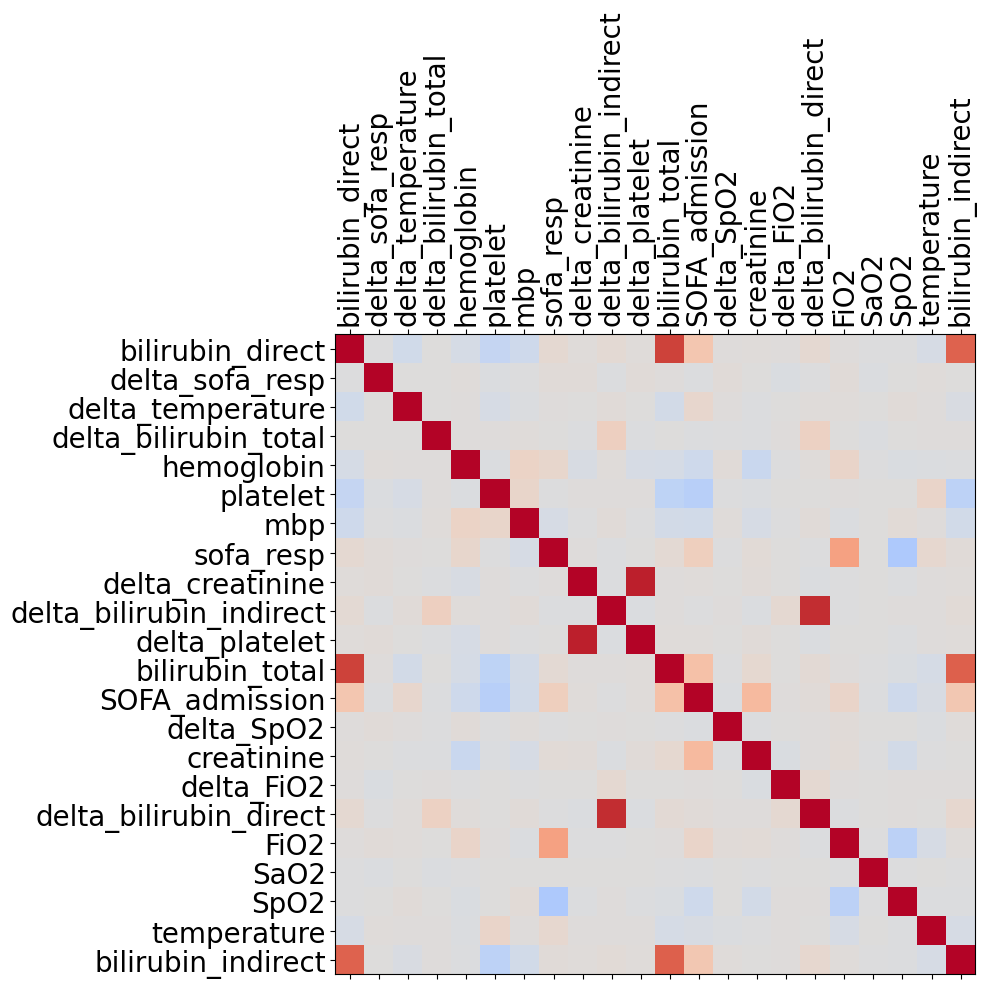

In [12]:
# Create a correlation plot
corr_data = df[list(set(temporal_clinical_variables))]
corr = corr_data.corr(method='pearson')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
# fig.colorbar(cax)
ticks = np.arange(0,len(corr_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_data.columns, fontsize=20)
ax.set_yticklabels(corr_data.columns, fontsize=20)
plt.tight_layout()
plt.show()

# # Manually find the significance
# # calculate_pvalues(corr_data)
# pval = corr_data.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*corr.shape)
# # p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
# # p = pval.applymap(lambda x: f' (p={x:.2f})')
# # display(corr.round(2).astype(str) + p)
# fig,ax = plt.subplots(1, 1, figsize=(10,10))
# ax.imshow(pval.values, cmap='coolwarm_r')
# ax.xaxis.tick_top()
# ax.set_xticks(range(len(pval.index)))
# ax.set_yticks(range(len(pval.index)))
# ax.set_xticklabels(column_labels, rotation=90)
# ax.set_yticklabels(column_labels, rotation=0)
# plt.tight_layout()
# plt.show()

In [ ]:
print(f'The number of initial temporal clinical variables is {len(temporal_clinical_variables)}')

# Select the number of related columns:
clinical_variables = patient_variables + demographic_variables
n_vals = [5,5]
ref_cols = ['SaO2','SpO2']
all_columns = {}

for i in range(len(n_vals)):
  all_columns[ref_cols[i]] = get_most_correlated(df[temporal_clinical_variables], variable=ref_cols[i], n=n_vals[i])

display(all_columns)
# n1 =  # Eg. 8
# n2 =  # Eg. 10
# ref_col1 = # Eg. 'SaO2'
# ref_col2 = # Eg.

# # Get variables correlated to 'ref_col'
# columns_1 = get_most_correlated(df[temporal_clinical_variables], variable=ref_col1, n=n1)

# # Get variables correlated to 'ref_col_2'
# columns_2 = get_most_correlated(df[temporal_clinical_variables], variable=ref_col2, n=n2)

# print(f'The number of resulting variables is {len(resulting_temporal_clinical_variables)}')

The number of initial temporal clinical variables is 23
########################################  SaO2  ########################################
The 5 most correlated variables to variable SaO2 are: 
SaO2           1.000000
delta_SpO2     0.002865
platelet       0.002687
temperature    0.002427
mbp            0.001844
Name: SaO2, dtype: float64
The 5 most inversely correlated variables to variable SaO2 are: 
creatinine              -0.004722
FiO2                    -0.006362
SOFA_admission          -0.008497
delta_bilirubin_total   -0.016894
delta_sofa_resp         -0.020103
Name: SaO2, dtype: float64
########################################  SpO2  ########################################
The 5 most correlated variables to variable SpO2 are: 
SpO2                        1.000000
mbp                         0.033998
mbp                         0.033998
delta_temperature           0.023508
delta_bilirubin_indirect    0.014507
Name: SpO2, dtype: float64
The 5 most inversely correlated var

{'SaO2': ['SaO2',
  'delta_SpO2',
  'platelet',
  'temperature',
  'mbp',
  'creatinine',
  'FiO2',
  'SOFA_admission',
  'delta_bilirubin_total',
  'delta_sofa_resp'],
 'SpO2': ['SpO2',
  'mbp',
  'mbp',
  'delta_temperature',
  'delta_bilirubin_indirect',
  'hemoglobin',
  'creatinine',
  'SOFA_admission',
  'FiO2',
  'sofa_resp']}

In [ ]:
# Optional: add another feature selection process to improve the model at a later stage
from typing import Any, List, Union

array_like = Union[pd.DataFrame, np.ndarray, List, Any]

outcome_var = "mortality_in"
K = 7
method = f_classif  # f_classif, chi2, mutual_info_classif, mutual_info_regression, etc

def feat_select(features: List[str], df: pd.DataFrame, outcome_var: str, K: int, method: Any) -> array_like:  
  X = df[features]
  y = df[outcome_var]
  return SelectKBest(method, k=K).fit(X, y).get_feature_names_out()

# resulting_temporal_clinical_variables = feat_select(resulting_temporal_clinical_variables, df, outcome_var, K, method)

In [ ]:
# Get the resulting dataframe
# Merge the resulting columns in a single list:
resulting_temporal_clinical_variables = temporal_clinical_variables

variables = list(set(patient_variables + demographic_variables + static_clinical_variables + resulting_temporal_clinical_variables + outcomes + treatment))

df = df[variables]
df.head()

,SpO2,subject_id,creatinine,bilirubin_direct,delta_FiO2,mortality_in,anchor_age,gender,language,delta_creatinine,...,delta_vent_start,invasive_vent,platelet,delta_temperature,delta_bilirubin_total,FiO2,insurance,mbp,delta_bilirubin_indirect,SaO2
0,89,10001884,1.2,NaN,0.0,1,68,F,ENGLISH,445.0,...,-4.0,0,144.0,-64.0,-1050.0,40.0,Medicare,96.0,NaN,90.0
1,94,10001884,1.2,NaN,0.0,1,68,F,ENGLISH,121.0,...,-328.0,0,144.0,92.0,-1374.0,40.0,Medicare,98.0,NaN,92.0
2,99,10002013,1.1,0.2,0.0,0,53,F,ENGLISH,-85.0,...,-123.0,1,254.0,-3.0,-23403.0,50.0,Medicare,86.5,-23403.0,99.0
3,97,10002013,1.1,0.2,0.0,0,53,F,ENGLISH,-184.0,...,-222.0,1,254.0,18.0,-23502.0,50.0,Medicare,73.0,-23502.0,96.0
4,98,10002013,0.9,0.2,0.0,0,53,F,ENGLISH,388.0,...,-32.0,0,248.0,28.0,-23732.0,50.0,Medicare,86.0,-23732.0,97.0


In [ ]:
# See the missing values
# sorted(null_values(df), key=lambda k:k[1])
null_values(df)

dropped_cols = [
    'bilirubin_direct',
    'delta_bilirubin_direct',
    'bilirubin_indirect',
    'delta_bilirubin_indirect',
    'bilirubin_total',
    'delta_bilirubin_total'
]

new_cols = [v for v in variables if v not in dropped_cols]
df = df[new_cols]
df.head()

,SpO2,subject_id,creatinine,delta_FiO2,mortality_in,anchor_age,gender,language,delta_creatinine,delta_SpO2,...,SOFA_admission,los_hospital,delta_vent_start,invasive_vent,platelet,delta_temperature,FiO2,insurance,mbp,SaO2
0,89,10001884,1.2,0.0,1,68,F,ENGLISH,445.0,-4,...,8,13,-4.0,0,144.0,-64.0,40.0,Medicare,96.0,90.0
1,94,10001884,1.2,0.0,1,68,F,ENGLISH,121.0,-28,...,8,13,-328.0,0,144.0,92.0,40.0,Medicare,98.0,92.0
2,99,10002013,1.1,0.0,0,53,F,ENGLISH,-85.0,0,...,4,5,-123.0,1,254.0,-3.0,50.0,Medicare,86.5,99.0
3,97,10002013,1.1,0.0,0,53,F,ENGLISH,-184.0,-42,...,4,5,-222.0,1,254.0,18.0,50.0,Medicare,73.0,96.0
4,98,10002013,0.9,0.0,0,53,F,ENGLISH,388.0,-32,...,4,5,-32.0,0,248.0,28.0,50.0,Medicare,86.0,97.0


### Understand how variables are distributed:

To see a description of some statistics of each numeric variable, you can use `df.describe()`:


In [ ]:
# Fix missing values
df['SaO2'] = df[df['SaO2'] > 100]

In [ ]:
df.describe()

,SpO2,subject_id,creatinine,delta_FiO2,mortality_in,anchor_age,delta_creatinine,delta_SpO2,delta_vp_start,temperature,...,stay_id,SOFA_admission,los_hospital,delta_vent_start,invasive_vent,platelet,delta_temperature,FiO2,mbp,SaO2
count,81797.000000,8.179700e+04,81747.000000,7.038300e+04,81797.000000,81797.000000,81747.000000,81797.000000,39795.000000,80836.000000,...,8.179700e+04,81797.000000,81797.00000,71727.000000,81797.000000,81750.000000,80836.000000,70383.000000,81797.000000,81797.000000
mean,96.786777,1.504775e+07,1.640256,-2.100696e+03,0.248016,64.748707,-30.735036,-26.009511,-105.506295,36.885300,...,3.496470e+07,7.886451,22.24897,-3711.441954,0.752069,170.416453,362.509983,53.577526,74.772473,254.715941
std,4.553809,2.878467e+06,1.282827,5.536244e+04,0.431864,14.386776,776.570510,17.978644,151.308336,0.784003,...,2.893477e+06,3.841586,21.93700,6208.705199,0.431814,105.583476,2460.677044,18.100129,15.026273,12604.604554
min,0.000000,1.000188e+07,0.100000,-5.175363e+06,0.000000,18.000000,-35303.000000,-90.000000,-2889.000000,27.200000,...,3.000065e+07,0.000000,0.00000,-86949.000000,0.000000,5.000000,-32690.000000,21.000000,1.000000,0.000000
25%,95.000000,1.251033e+07,0.900000,0.000000e+00,0.000000,57.000000,-171.000000,-40.000000,-128.000000,36.500000,...,3.242214e+07,5.000000,8.00000,-4399.000000,1.000000,101.000000,-34.000000,40.000000,66.000000,95.000000
50%,98.000000,1.506291e+07,1.200000,0.000000e+00,0.000000,67.000000,-18.000000,-24.000000,-53.000000,36.890000,...,3.489615e+07,8.000000,16.00000,-1231.000000,1.000000,147.000000,2.000000,50.000000,73.000000,97.000000
75%,100.000000,1.753622e+07,2.000000,0.000000e+00,0.000000,75.000000,108.000000,-11.000000,-19.000000,37.300000,...,3.750139e+07,11.000000,29.00000,-350.000000,1.000000,212.000000,79.000000,60.000000,81.000000,98.000000
max,147.000000,1.999984e+07,21.200000,0.000000e+00,1.000000,91.000000,143183.000000,0.000000,0.000000,42.060000,...,3.999923e+07,23.000000,249.00000,0.000000,1.000000,1458.000000,46417.000000,100.000000,299.000000,999999.000000


The problem with `data.describe()` is that it groups using all the data of each variable, this means that if in our group there are populations that are underestimated or overestimated, the description will not take that into account. An alternative to solve that problem is using the function `groupby()`. With group by we can generate groups of populations using variables. An exmple is:

In [ ]:
# Group the mean of oxygen saturation of arterial blood (SaO2) by gender
avg_sao2_by_gender = df.groupby('gender')['SaO2'].mean()
avg_sao2_by_gender

gender
F    338.010395
M    209.201145
Name: SaO2, dtype: float64

You can also generate groups using more than one variable and more than one grouping methods

In [ ]:
# Obtain count, mean, standard deviation, min value and max value for (SaO2) and (SpO2) grouping by gender and race group:
avg_sao2_by_ethnicity = df.groupby(['gender', 'race_group']).agg({
    'SaO2': ['count', 'mean', 'std', 'min', 'max'], 
    'SpO2': ['count', 'mean', 'std', 'min', 'max']
})
avg_sao2_by_ethnicity

Alternatively, there are also libraries that allow us to do this process automatically. Below is an example using tableone library. 

Install using the command `!pip install tableone`

In [ ]:
# As a first step let's do a preprocessing to some variables like:
df['language'] = df['language'].replace({'ENGLISH': 'Proficient', '?': 'Limited Proficiency'})

In [ ]:
!pip install tableone
from tableone import TableOne

groupby = ['race_group']

categorical_variables = ['mortality_in','gender', 'language', 'invasive_vent']
numerical_variables = ['anchor_age', 'los_icu', 'los_hospital', 'CCI', 'SOFA_admission']
columns = categorical_variables + numerical_variables

labels ={'anchor_age': 'age',
         'SOFA_admission': 'SOFA'} 


mytable = TableOne(df, columns=columns, categorical=categorical_variables, groupby=groupby, nonnormal=numerical_variables, rename=labels, pval=False)
mytable

###### ✏️ Use tableone

Now let's create a new tableone using all the variables to to measure differences between ethnic groups!

Hint: Use the function `get_categorical_numerical_variables` to get all the numeric and categorical variables. Then use those variables to generate a tableone of the whole dataset


In [ ]:
def get_categorical_numerical_variables(df, limit, ignore, verbose=True):
  """
  File to get numerical and categorical variables
  Inputs:
  df: A pandas dataframe with all the variables
  limit: A integer with the maximum number of unique items in a variable to be categorical
  ignore: Python list with columns to ignore

  Outputs:
  categorical_columns, numerical_columns: List with the names of categorical and numerical variables

  """
  
  categorical_columns = []
  numerical_columns = []

  for column in df.columns:
    if ignore:
      if column in ignore:
        continue
    unique_values = len(pd.unique(df[column]))
    if unique_values <= limit:
      if verbose:
        print(f'The column {column} has {unique_values}, so is categorical')
      categorical_columns.append(column)
    else:
      if verbose:
        print(f'The column {column} has {unique_values}, so is numerical')
      numerical_columns.append(column)

  return categorical_columns, numerical_columns

In [ ]:
# Select the columns for the tableone
groupby = #
ignore = ['column1', 'column2', ...] + groupby
limit = # Max. Number of unique values to be categorical (E.g. 15)
categorical_columns, numerical_columns = get_categorical_numerical_variables(df, limit=limit, ignore=ignore)

In [ ]:
Total_columns = 

TableOne(df, columns=Total_columns, categorical=categorical_columns, nonnormal=numerical_columns, groupby=groupby)

### visualize your data

While statistics are important, it is also very important and key to visualize the data. This will help to share the information and results in a visual and intuitive way, and identify anomalous and data patterns that could be useful when choosing the model.

#### Bar charts and histograms
Bar charts and histograms can be used to see how our data is distributed and how many instances there are of each class, this way we can identify imbalances in the classes and avoid overfitting in the models

To create a histogram with seaborn, you can use the code:


```
sns.histplot(data=df, x="column_name", kde=False) #optional kwarg: hue="column_2"
plt.title('Title')
plt.show()
```




###### ✏️ Plot the distribution by race group

###### ✏️ Plot the distribution by gender

###### ✏️ Plot the distribution by age and race group

#### Box plots and violin plots
**Outilers ❗❗❗**: While in some cases there are no null values, could be outliers values. These outliers are sometimes indicators of biases in data collection, or social/cultural biases. However, in some cases the outliers are erroneous values during data collection and storage. Identifying values such as very high SaO2 (99999) or negative is an indicator in many cases of missing values and should be taken as such.

Bar and violin charts are one of the best ways to identify outliers, because they show us around which values most of our data is clustered.

In [ ]:
def plot_groupby(df, group1, group2, variable, barplot=True, boxplot=True, violinplot=False):

  """
  This function creates two plots that compare the average values of a variable for two groups in a pandas dataframe.
  The function allows the user to choose between a bar plot, box plot, and violin plot for each group.
  The first plot compares the averages for the first group, and the second plot compares the averages for the second group.
  
  Inputs:
  df: pandas dataframe
  group1: string, name of the first categorical variable to group by
  group2: string, name of the second categorical variable to group by
  variable: string, name of the numerical variable to plot
  barplot: boolean, optional, default True. Whether to plot bar plots or not
  boxplot: boolean, optional, default True. Whether to plot box plots or not
  violinplot: boolean, optional, default False. Whether to plot violin plots or not
  
  Outputs: 
  None
  """

  avg_by_group1 = df.groupby(group1)[variable].mean()
  avg_by_group2 = df.groupby(group2)[variable].mean()

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
  
  if barplot:
    # Bar plot
    print('Bar Plot: ')
    ax1.bar(avg_by_group1.index, avg_by_group1.values)
    ax1.set_xlabel(group1)
    ax1.set_ylabel(f'Average {variable}')
    ax2.bar(avg_by_group2.index, avg_by_group2.values)
    ax2.set_xlabel(group2)
    ax2.set_ylabel(f'Average {variable}')
    plt.show()

  if boxplot:
    # Create box plots to visualize the distribution of SaO2 values by gender and ethnicity
    print('Box Plot: ')
    sns.boxplot(x=group1, y=variable, hue=group2, data=df)
    plt.show()

  if violinplot:
    print('Violin Plot: ')
    sns.violinplot(x=group1, y=variable, hue=group2, data=df)
    plt.show()


###### ✏️ Plot the distribution of SaO2 by gender and race group

In [ ]:
# Use plot_groupby():


###### ✏️ Plot the distribution of SpO2 by gender and race group

In [ ]:
# Use plot_groupby():


###### ✏️ Plot the distribution of any Time Offset by gender and race group (Use violin plot)

Hint: You can use the next line of code to get all the variables related to a time offset

In [ ]:
for column in df.columns:
  if 'delta' in column:
    print(column)

delta_SpO2
delta_vent_start
delta_ld_ldh
delta_sofa_liver


In [ ]:
# Use plot_groupby():


## 4. Preprocessing
---
We know that there are some outliers so let's assume that those values al missing values and then analyze the amount of missing values for preprocessing

### Missing values

Let's see which columns have variables with missing data

In [ ]:
msno.matrix(df)

###### ✏️ detect columns with null values
Use the function `null_values` to see the columns with missing data and the number of rows missing.

if the number of values with missing data is very high compared to the size of the dataset (E.g. 85%), in some cases it is better just to remove them

In [ ]:
### List of columns with mussing values ###


Null values: 
norepinephrine_equivalent_dose    9972
ventilation_status                2342
rdw                                 13
FiO2                              2720
lactate                             78
bun                                 14
glucose_lab                         14
ph                                  18
delta_vent_start                  2342
mchc                                12
chloride                            14
BMI                               3853
pt                                  14
delta_ld_ldh                      2256
sofa_resp                          519
albumin                            676
aniongap                            14
mcv                                 12
delta_sofa_liver                  5654
ld_ldh                            2256
dtype: int64


### Train-Test Split
Dividing your dataset into training and test is important, since what we want is for the model to learn, not memorize.
We want to test the behavior of the model on unknown data. For that reason, the dataset should always be divided into training and test. 

The way to divide it may vary... You can use 60% (training) / 40% (testing), or 70% (training) / 30% (testing), or even 50/50. The most important part is that you **make sure that in the test set you have a well-distributed data set that covers all the possibilities.**

In [ ]:
def train_test_split_with_id(df, test_size, id_column, stratify=None, random_state=None):
  """
  Splits a dataset into train and test sets while ensuring that no rows with the same ID value appear in both sets.

  Parameters:
  df (pandas.DataFrame): The dataset to be split.
  test_size (float): The proportion of the data to be used for the test set.
  id_column (str): The name of the column containing the IDs used to identify patients. (A patient in train should not be also in test)
  stratify (array-like): The values used for stratification. If None, stratification is not performed (optional).
  random_state (int): The random seed used for the split (optional).

  Returns:
  tuple: A tuple of two pandas.DataFrames representing the train and test sets.
  """
  if stratify:
    id_groups = df.groupby(id_column)
    ids = []
    ys = []
    for _, group in id_groups:
        ids.append(group[id_column].iloc[0])
        ys.append(group[stratify].iloc[0])
    ids = np.array(ids)
    ys = np.array(ys)
    
    train_ids, test_ids, train_ys, test_ys = train_test_split(ids, ys, test_size=test_size, stratify=ys, random_state=random_state)

  else:
    unique_ids = df[id_column].unique()
    train_ids, test_ids = train_test_split(unique_ids, test_size=test_size, random_state=random_state)
  
  train = df[df[id_column].isin(train_ids)]
  test = df[df[id_column].isin(test_ids)]

  print(f'The train shape is {train.shape}')
  print(f'The test shape is {test.shape}')
  
  return train, test
  

###### ✏️ Split your data
Use the provided function to split your data into train and test. We have to split the dataset now so we can avoid data leakage during data imputation and data normalization

In [ ]:
test_size = 
id_column = # Avoid same patient in train and test!!!
stratify = 

train, test = train_test_split_with_id('...')

### Data Imputation

There are various imputation methods of different complexity, ranging from imputing using the most common value (mode) (usually used for categorical variables) or the average or median value depending on the distribution of the data (usually used for numerical variables), to imputation methods using machine learning algorithms to predict the missing value using the other variables as a reference. While any method of data imputation can be valid, you have to take care to avoid data leakage or adding bias when doing this process.

As we have the columns with missing data, let's divide the columns into two sub groups:
1. Categorical columns with missing
2. Numerical columns with missing

###### ✏️ Get numerical, categorical columns and columns with missing data

Hint: You can use the function `get_categorical_numerical_variables` to get the list of categorical and mumerical columns. 

Hint 2: You can use the function `null_values` as part of the logic to get the columns with missing data

In [ ]:
# Get numerical and categorical columns:
categorical_cols, numerical_cols = 

In [ ]:
# Get the columns with missing data
columns_missing = 

In [ ]:
def apply_data_imputation(df, impute_cols, test_df=None, groupby_cols=[], method='new_category_numeric', model=LinearRegression()):

  """
  Apply data imputation on missing values of columns by groupby the given columns.

  Important!!! 
  If you apply other technique than `new_category` on categorical variables
  or `new_category_numeric` on numerical variables. You should do it 
  ONLY AFTER train-test split otherwise you could be introducing a data leakage in the test set.

  Inputs:
  df: Pandas DataFrame with the input data to apply data imputation.
  impute_cols: list with the column names to apply data imputation.
  test_df (Optional): Pandas DataFrame with the test set to apply data imputation using train as reference.
  groupby_cols: list with the column names to groupby the data if method='median', 'mean' or 'mode' or features of the model if method='model' (E.g.: groupby_cols=['race_group', 'gender']).
  method: str with the method to apply data imputation. Available options are 'median', 'mean', 'mode', 'new_category', 'new_category_numeric' and 'model'.
  model: sklearn model used to predict the missing value if method == 'model'

  Output:
  Pandas DataFrame with the data after applying data imputation on missing values of columns.
  """
  imputer = {}

  for col in impute_cols:
      
    # Group the data and calculate the method (E.g. Median) for each group
    if method == 'median':
      # Impute using median (for numerical values)
      imputation_values = df.groupby(groupby_cols)[col].median()

    elif method == 'mean':
      # Impute using mean (for numerical values)
      imputation_values = df.groupby(groupby_cols)[col].mean()

    elif method == 'mode':
      # Impute using mode (for categorical values)
      imputation_values = df.groupby(groupby_cols)[col].agg(pd.Series.mode)

    elif method == 'new_category':
      # Add a new category 'None' in the dataset (for categorical values)
      new_category_val = 'None'
      imputer[col] = new_category_val
      df[col] = df[col].fillna(new_category_val)
      if test_df is not None:
        test_df[col] = test_df[col].fillna(new_category_val)
      

    elif method == 'new_category_numeric':
      # Add an anomalous data in the dataset (for numerical values)
      new_category_val = 0
      # If there's not 0, replace nan with 0
      if not((df[col] == 0).any()):
        new_category_val = 0
      # If there's not positive numbers, replace nan with 1
      elif not((df[col] >= 0).any()):
        new_category_val = 1
      # If there's not negative numbers, replace nan with 1
      elif not((df[col] <= 0).any()):
        new_category_val = -1
      else:      
        # Replace with min value - 100
        new_category_val = df[col].min() - 100
      
      imputer[col] = new_category_val
      df[col] = df[col].fillna(new_category_val)
      if test_df is not None:
        test_df[col] = test_df[col].fillna(new_category_val)


    elif method == 'model':
      # If the variable is categorical, convert to numeric:
      if df[col].dtype == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
        if test_df is not None:
          test_df[col] = encoder.fit_transform(test_df[col])

      # Create a linear regression model to impute missing values
      model = model

      # Get the data with complete column
      complete_data = df.dropna(subset=[col])

      # Encode categorical columns if needed in x data
      le = {}
      for col_group in groupby_cols:
        if df[col_group].dtype == 'object':
          le[col_group] = LabelEncoder()
          complete_data[col_group] = le[col_group].fit_transform(complete_data[col_group])

      # Fit the model on the complete data
      X = complete_data[groupby_cols]
      # Replace any remaining NaNs with the column mean
      X = X.fillna(X.mean())
      y = complete_data[col]
      model.fit(X, y)

      if df[col].dtype == 'object':
        imputer[col] = (model, encoder, le)
      else:
        imputer[col] = (model, le)

      ### Impute column using the model to predict the value:
      missing_data = df[df[col].isna()]
      if test_df is not None:
          missing_data_test = test_df[test_df[col].isna()]

      # Encode categorical columns if needed in x data
      for col_group in groupby_cols:
        if missing_data[col_group].dtype == 'object':
          missing_data[col_group] = le[col_group].transform(missing_data[col_group])
          if test_df is not None:
            missing_data_test[col_group] = le[col_group].transform(missing_data_test[col_group])

      for index, row in missing_data.iterrows():
          values = row[groupby_cols].values.reshape(1, -1)
          imputed_value = model.predict(values)
          df.at[index, col] = imputed_value[0]

      if test_df is not None:
          for index, row in missing_data_test.iterrows():
            values = row[groupby_cols].values.reshape(1, -1)
            imputed_value = model.predict(values)
            test_df.at[index, col] = imputed_value[0]
          
    if method in ['median', 'mean', 'mode']:
      imputer[col] = imputation_values
      # Fill missing values with the method of the corresponding group
      df[col] = df.apply(lambda x: imputation_values[tuple(x[groupby_cols])] if pd.isna(x[col]) else x[col], axis=1)
      if test_df is not None:
        test_df[col] = test_df.apply(lambda x: imputation_values[tuple(x[groupby_cols])] if pd.isna(x[col]) else x[col], axis=1)
  
  if test_df is not None:
    return df, test_df, imputer
  else:
    return df, imputer


###### ✏️ Apply data imputation to categorical variables

1. Get from the categorical variables the list of categorical columns with missing data
2. Use the function `apply_data_imputation` to impute the variables of train and test data. You can also use other methods of pandas or sklearn. But think about the possible bias that those methods could be adding to the dataset.

In [ ]:
# Get from columns with missing data the categorical columns
categorical_cols_missing = 

**Important❗❗❗** If you apply other technique than `new_category` on categorical variables. You should do it after train-test split otherwise you could be introducing a data leakage in the test set

In [ ]:
method =  # 'mode', 'new_category'
groupby_cols =  # E.g. ['race_group', 'gender'] or None if is new_category

train, test, imputer = apply_data_imputation(train, impute_cols=categorical_cols_missing, method=method, groupby_cols=groupby_cols, test_df=test)

###### ✏️ Apply data imputation to Numerical variables

1. Get from the numerical variables the list of numerical columns with missing data
2. Use the function `apply_data_imputation` to impute the variables of train and test data. You can also use other methods of pandas or sklearn. But think about the possible bias that those methods could be adding to the dataset.

In [ ]:
# Get from columns with missing data the numerical columns
numerical_cols_missing = 

**Important ❗❗❗** If you apply other technique than `new_category_numeric` on numerical variables. You should do it after train-test split otherwise you could be introducing a data leakage in the test set

In [ ]:
method = # 'median', 'mean', 'new_category_numeric', 'model'
groupby_cols =  # E.g. ['race_group', 'gender'] or None if is new_category_numeric

train, test, imputer = apply_data_imputation(train, impute_cols=numerical_cols_missing, method=method, groupby_cols=groupby_cols, test_df=test)

###### ✏️ Let's check null values again

Print the coluns with missing values (if any) in train and test set. 

There should be no columns with missing data, if so check the previous tasks

In [ ]:
### List of columns with mussing values ###
print('#'*20, ' Null train: ', '#'*20)
null_values(train)
### List of columns with mussing values ###
print('#'*20, ' Null test: ', '#'*20)
null_values(test)

### Encoding

Since the machine learning model in the background models and finds patterns in our data. It only supports numeric values. For this reason, categorical variables must be coded to numeric values.

Categorical variables can be of 3 types:
- Binary variables: Binary variables can be represented with two values, 1 and 0. Examples are whether or not the variable belongs to a group.
- Ordinal variables: Ordinal variables are a type of variables that have a specific order and can be represented with numeric variables through a label encoder. An example is High, Medium, and Low which can be represented as 3, 2, 1.
- Nominal variables: Nominal variables are categorical variables that do not have a defined order, for these variables it is not recommended to use a label encoder, it is better to use one hot encoder in these cases.

###### ✏️ Which type of categorical variables we have?

From the list of categorical variables, provide:

* List of binary variables
* List of ordinal variables
* List of Nominal variables

Not necessarily must have variables of each type.

Hint: you can use `pd.unique(df[column])` to see the unique values in a specific column. You can use this information to make your decisions

In [ ]:
print(f'Categorical: ')
print(categorical_cols)

Categorical: 
['invasive_vent', 'language', 'ventilation_status', 'insurance', 'race_group', 'gender', 'rrt', 'mortality_in', 'sofa_resp', 'hidden_hypoxemia']


In [ ]:
# Unique values in categorical columns

* The binary variables are: `var1, var2, ...`
* The ordinal variables are: `var1, var2, ...`
* The Nominal variables are: `var1, var2, ...`


###### ✏️ Encode binary variables

Machine learning models only understand numbers, so binary variables must be encoded as 1s and 0s. Replace the values in those columns with 1s and 0s

Hint: you can use `df.replace()` to do that

###### ✏️ Encode ordinal variables

You can use the function `label_encoder ` to encode the ordinal variables as numeric variables.

**Hint**: Some variables are already numerical, but have 'None' due to the imputation. You can use `df.replace` to convert that 'None' to numerical

In [ ]:
def label_encoder(df, cols, df_test=None):
  """
  This function applies the LabelEncoder from Scikit-learn to encode categorical variables in a Pandas DataFrame.

  Parameters:

  df: Pandas DataFrame. The DataFrame to be encoded.
  cols: list. List of column names to be encoded.
  df_test: Pandas DataFrame (optional). The DataFrame to be encoded using the same encoders used on the training set.
  Returns:

  If df_test is None, the function returns a tuple containing the encoded DataFrame and a dictionary with the LabelEncoders used for each column. Otherwise, it returns a tuple with the encoded training DataFrame, the encoded test DataFrame and a dictionary with the LabelEncoders used for each column.
  """
  encoders = {}
  for col in cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
    if df_test is not None:
      df_test[col] = encoders[col].transform(df_test[col])
  
  if df_test is not None:
    return df, df_test, encoders
  else:
    return df, encoders

def label_encoder_test(df, encoders):
  """
  This function applies the LabelEncoder from Scikit-learn to encode categorical variables in a Pandas DataFrame.

  Parameters:

  df: Pandas DataFrame. The DataFrame to be encoded.
  encoders: Python dictionary. Dictionary with the encoders trained on the train set.

  """
  encoders = {}
  for col in encoders.keys():
    df[col] = encoders[col].transform(df[col])

  return df


In [ ]:
### This is not the case, but just to show how to use the function:
# train, test, encoders = label_encoder(train, ['insurance'], df_test=test)

###### ✏️ Encode nominal variables

You can use the function `column_to_one_hot` to encode the nominal variables to a [one-hot representation](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/). 

In [ ]:
def column_to_one_hot(train_df, column, test_df=None):
  # Generate a one-hot representation of the values in the column
  train_one_hot = pd.get_dummies(train_df[column])
  # add the one-hot encoded columns to the DataFrame
  train_df = pd.concat([train_df, train_one_hot], axis=1)
  # drop the original column
  train_df = train_df.drop(column, axis=1)

  if test_df is not None:
    test_one_hot = pd.get_dummies(test_df[column])
  
    # Add missing columns in test data
    missing_cols = set(train_one_hot.columns) - set(test_one_hot.columns)
    for c in missing_cols:
      test_one_hot[c] = 0
    
    # Ensure the order of column in the test set is in the same order than in train set
    test_one_hot = test_one_hot[train_one_hot.columns]
    test_df = pd.concat([test_df, test_one_hot], axis=1)
    test_df = test_df.drop(column, axis=1)
    return train_df, test_df
  else:
    return train_df

In [ ]:
# E.g. Convert 'insurance' column into one-hot encoding:
# train, test = column_to_one_hot(train, 'insurance', test)

### Feature Engineering

Once we have cleaned the dataset we can engineer the features that can provide more information to the model to generate the predictions.

We'll print the correlation to SpO2 as a reference to see the most correlated variables before and after generating the new features.

In [ ]:
# Get variables correlated to SpO2
columns_sao2 = get_most_correlated(train, variable='SpO2', n=5)

In [ ]:
# Length of ICU stay in days for dead
train['los_icu_dead'] = train[train.mortality_in == 1].los_icu
test['los_icu_dead'] = test[test.mortality_in == 1].los_icu

# Length of ICU stay in days for survivors
train['los_icu_surv'] = train[train.mortality_in == 0].los_icu
test['los_icu_surv'] = test[test.mortality_in == 1].los_icu

In [ ]:
# Get variables correlated to SpO2
columns_sao2 = get_most_correlated(train, variable='SpO2', n=5)

Surprise! we can see how before the correlation `los_icu` and `mortality_in` were not there, but after the feature engineering the new feature `los_icu_dead` is there! 

That shows the importance of being able to do good feature engineering.

In [ ]:
# Clean the new added columns:
method = 'new_category_numeric'
impute_cols = ['los_icu_dead', 'los_icu_surv']
train, test, _ = apply_data_imputation(train, impute_cols=impute_cols, method=method, test_df=test)

###### ✏️ Create your own features (Optional)

Use the dataset to generate new features

### Normalization:
Data normalization is an important step in machine learning because it helps to ensure that features are on similar scales, which can improve the performance of many machine learning algorithms.

When features are not on similar scales, some algorithms may be more heavily influenced by certain features than others, which can lead to suboptimal performance. Additionally, some algorithms (such as those based on distance calculations) can be sensitive to differences in scale between features, which can lead to incorrect results.

By normalizing the data, we can ensure that each feature contributes equally to the model, regardless of its scale. This can lead to better accuracy and more robust models.

In [ ]:
def normalize_data(train_data, test_data=None, scaler=None, ignore_cols=[]):
  # Filter out columns to ignore
  train_data_filtered = train_data.drop(ignore_cols, axis=1)
  if test_data is not None:
    test_data_filtered = test_data.drop(ignore_cols, axis=1)
  
  if not scaler:
    scaler = MinMaxScaler()
    scaler.fit(train_data_filtered)
  
  normalized_train = scaler.transform(train_data_filtered)
  
  if test_data is not None:
    normalized_test = scaler.transform(test_data_filtered)
    normalized_train_df = pd.DataFrame(normalized_train, columns=train_data_filtered.columns)
    normalized_test_df = pd.DataFrame(normalized_test, columns=test_data_filtered.columns)
    return normalized_train_df, normalized_test_df, scaler
  else:
    normalized_train_df = pd.DataFrame(normalized_train, columns=train_data_filtered.columns)
    return normalized_train_df, scaler


###### ✏️ Normalize your data

Use the function to normalize the data. Remember to exclude information that does not contribute to the final model, such as identifiers.

Feel free to include other data [normalization methods](https://scikit-learn.org/stable/modules/preprocessing.html).

In [ ]:
ignore_cols = #
normalized_train, normalized_test, scaler = 

### Class Imbalance
In order to allow you to play with other methods for data balancing such as modifying the weights of the model. The dataset will be delivered unbalanced. However it is important that you play around with different methods such as undersampling or oversampling to balance the training data.

### Save the file!
Finally let's save the dataset as a csv file! 😀

In [ ]:
normalized_train

###### ✏️ Save your train and test dataset as a csv file:

Hint: use `df.to_csv('path/data_clean.csv', index=False)`

In [ ]:
#@markdown ###  ✏️Save your train and test dataset as a csv file:
path_to_save_train = "path/train.csv" #@param {type:"string"}
path_to_save_test = "path/test.csv" #@param {type:"string"}


In [ ]:
import os
import pandas as pd

# Function to create the directory if it doesn't exist
def create_directory_if_not_exists(path):
    directory = os.path.dirname(path)
    os.makedirs(directory, exist_ok=True)

# Save function to be used for both train and test datasets
def save_dataset(dataset, path_to_save):
    create_directory_if_not_exists(path_to_save)
    dataset.to_csv(path_to_save, index=False)

In [ ]:
# Export files:


# Thank you very much! 

From the MIT Critical Data team we wish you good luck 😀!!

Your mentors:

- David Restrepo: davidres@mit.edu
- Sebastian Cajas: ulsordonez@unicauca.edu.co 
- Adrien Carrel: a.carrel@hotmail.fr
- Jack Gallifant: jack.gallifant@nhs.net